In [70]:
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://pyramid-arima.readthedocs.io/en/latest/_submodules/arima.html
import numpy
from numpy import newaxis
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima

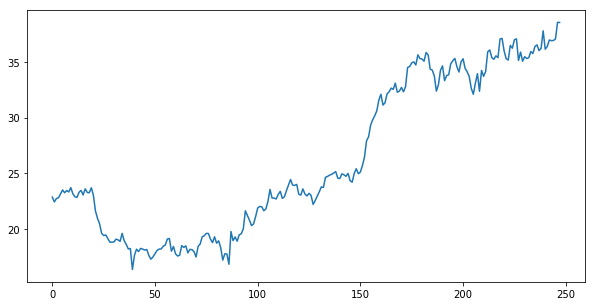

In [71]:
dataset = pandas.read_csv('URBN.csv', usecols=[1], engine='python', skipfooter=3)
dataset = numpy.flipud(dataset)[1::]
plt.figure(figsize=(10,5))
plt.plot(dataset)
plt.show()
#dataset = dataframe.values
dataset = dataset.astype('float32')

In [72]:
# fix random seed for reproducibility
#numpy.random.seed(7)

In [73]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [74]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

166 82


In [75]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [76]:
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [77]:
trainX.shape

(150, 15)

In [78]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [79]:
trainX.shape

(150, 1, 15)

In [80]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 1s - loss: 0.0164
Epoch 2/200
 - 0s - loss: 0.0055
Epoch 3/200
 - 0s - loss: 0.0038
Epoch 4/200
 - 0s - loss: 0.0037
Epoch 5/200
 - 0s - loss: 0.0030
Epoch 6/200
 - 0s - loss: 0.0029
Epoch 7/200
 - 1s - loss: 0.0031
Epoch 8/200
 - 1s - loss: 0.0023
Epoch 9/200
 - 0s - loss: 0.0021
Epoch 10/200
 - 0s - loss: 0.0022
Epoch 11/200
 - 0s - loss: 0.0021
Epoch 12/200
 - 1s - loss: 0.0020
Epoch 13/200
 - 1s - loss: 0.0020
Epoch 14/200
 - 0s - loss: 0.0024
Epoch 15/200
 - 0s - loss: 0.0023
Epoch 16/200
 - 1s - loss: 0.0016
Epoch 17/200
 - 0s - loss: 0.0021
Epoch 18/200
 - 0s - loss: 0.0021
Epoch 19/200
 - 0s - loss: 0.0019
Epoch 20/200
 - 0s - loss: 0.0016
Epoch 21/200
 - 0s - loss: 0.0021
Epoch 22/200
 - 0s - loss: 0.0017
Epoch 23/200
 - 0s - loss: 0.0021
Epoch 24/200
 - 0s - loss: 0.0022
Epoch 25/200
 - 0s - loss: 0.0019
Epoch 26/200
 - 0s - loss: 0.0014
Epoch 27/200
 - 0s - loss: 0.0016
Epoch 28/200
 - 0s - loss: 0.0018
Epoch 29/200
 - 0s - loss: 0.0016
Epoch 30/200
 - 0s - lo

In [81]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.63 RMSE
Test Score: 1.83 RMSE


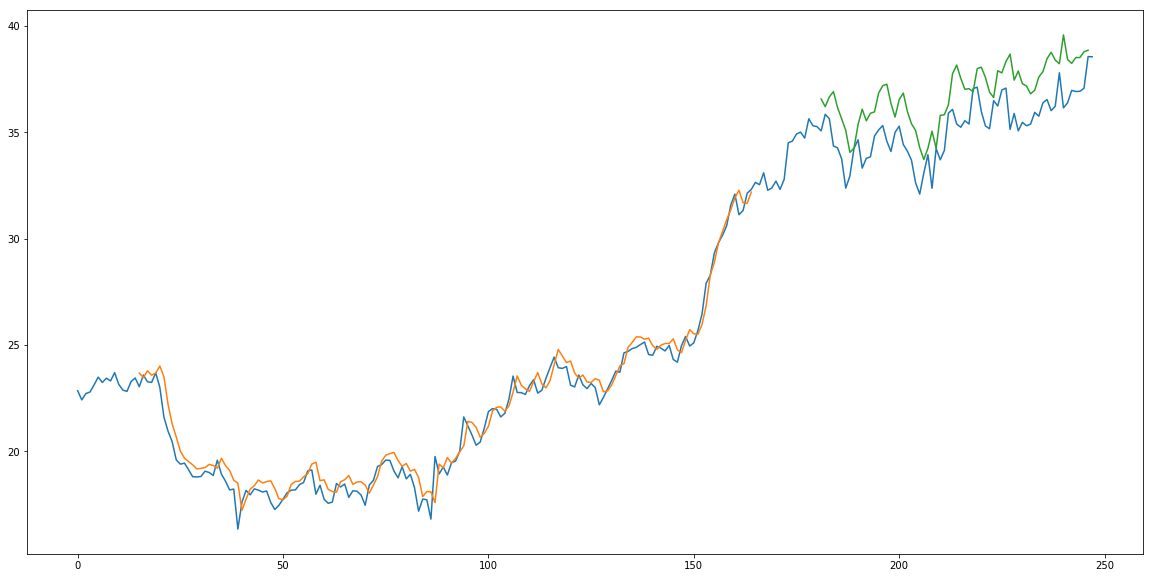

In [82]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
train2 = dataset
trainX2, trainY2 = create_dataset(train2, look_back)
trainX2 = numpy.reshape(trainX2, (trainX2.shape[0], 1, trainX2.shape[1]))
trainX2.shape, trainY2.shape

((232, 1, 15), (232,))

In [84]:
model2 = Sequential()
model2.add(LSTM(64, input_shape=(1, look_back)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX2, trainY2, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 1s - loss: 0.0297
Epoch 2/200
 - 1s - loss: 0.0075
Epoch 3/200
 - 1s - loss: 0.0079
Epoch 4/200
 - 1s - loss: 0.0057
Epoch 5/200
 - 1s - loss: 0.0055
Epoch 6/200
 - 1s - loss: 0.0063
Epoch 7/200
 - 1s - loss: 0.0053
Epoch 8/200
 - 1s - loss: 0.0047
Epoch 9/200
 - 1s - loss: 0.0041
Epoch 10/200
 - 1s - loss: 0.0049
Epoch 11/200
 - 1s - loss: 0.0043
Epoch 12/200
 - 1s - loss: 0.0042
Epoch 13/200
 - 1s - loss: 0.0054
Epoch 14/200
 - 1s - loss: 0.0044
Epoch 15/200
 - 1s - loss: 0.0044
Epoch 16/200
 - 1s - loss: 0.0043
Epoch 17/200
 - 1s - loss: 0.0052
Epoch 18/200
 - 1s - loss: 0.0033
Epoch 19/200
 - 1s - loss: 0.0031
Epoch 20/200
 - 1s - loss: 0.0044
Epoch 21/200
 - 1s - loss: 0.0038
Epoch 22/200
 - 1s - loss: 0.0039
Epoch 23/200
 - 1s - loss: 0.0030
Epoch 24/200
 - 1s - loss: 0.0033
Epoch 25/200
 - 1s - loss: 0.0035
Epoch 26/200
 - 1s - loss: 0.0043
Epoch 27/200
 - 1s - loss: 0.0042
Epoch 28/200
 - 1s - loss: 0.0032
Epoch 29/200
 - 1s - loss: 0.0035
Epoch 30/200
 - 1s - lo

In [85]:
# make predictions
trainPredict2 = model2.predict(trainX2)
# invert predictions
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY2])
# calculate root mean squared error
trainScore2 = math.sqrt(mean_squared_error(trainY2, trainPredict2.T))
print('Train Score2: %.2f RMSE' % (trainScore2))

Train Score2: 0.66 RMSE


In [86]:
trainY2.shape, trainPredict2.shape

((1, 232), (232, 1))

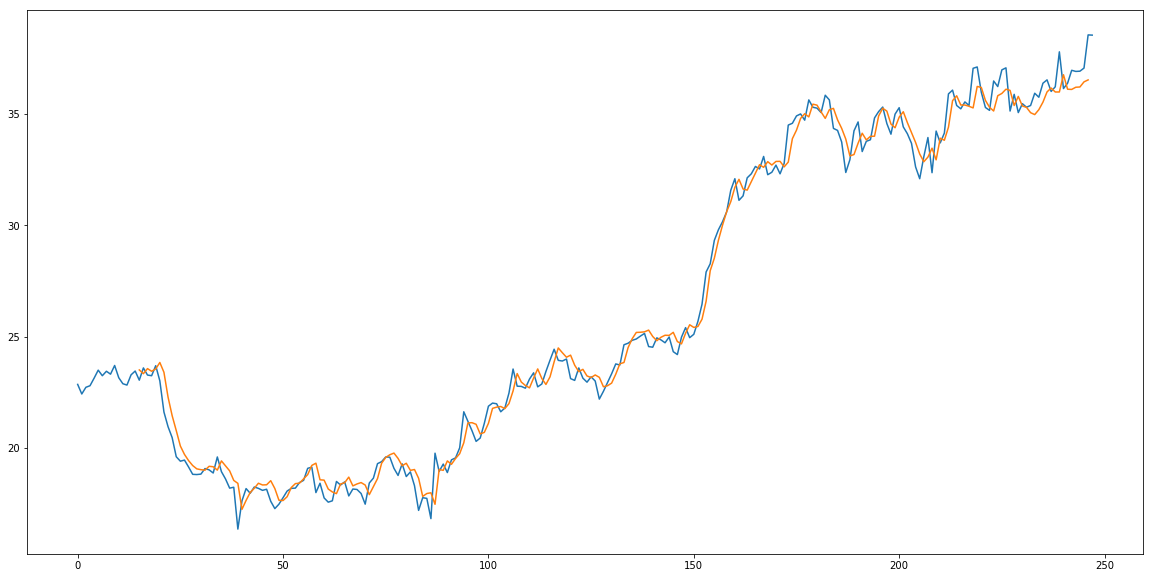

In [87]:
# shift train predictions for plotting
trainPredictPlot2 = numpy.empty_like(dataset)
trainPredictPlot2[:, :] = numpy.nan
trainPredictPlot2[look_back:len(trainPredict2)+look_back, :] = trainPredict2

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot2)
plt.show()

In [88]:
import pandas as pd
#from plotly.plotly import plot_mpl
#from statsmodels.tsa.seasonal import seasonal_decompose

In [89]:
#trainPredict2 = pd.DataFrame(trainPredict2)
#result = seasonal_decompose(trainPredict2, model='multiplicative')
#fig = result.plot()
#plot_mpl(fig)

In [90]:
numpy.savetxt("LSTM_Predicted.csv", trainPredict2, delimiter=",")

In [91]:
stepwise_model = auto_arima(trainPredict2, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=260.408, BIC=277.641, Fit time=0.953 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=336.293, BIC=350.080, Fit time=0.316 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=260.462, BIC=274.249, Fit time=0.836 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=261.762, BIC=282.442, Fit time=1.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=399.908, BIC=413.695, Fit time=0.251 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=262.171, BIC=282.851, Fit time=2.376 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=263.589, BIC=287.716, Fit time=2.891 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=258.555, BIC=27

In [92]:
print(stepwise_model.aic())

258.555147549


In [93]:
n_periods = 30
future_forecast = stepwise_model.predict(n_periods=n_periods)
print(future_forecast)
trainPredict2full = numpy.append(trainPredict2,future_forecast)

[ 36.72555334  36.83158406  37.04325879  37.18108774  37.31448457
  37.47768062  37.60689696  37.81929985  37.93387719  38.15216188
  38.29606883  38.43539753  38.60448531  38.73958236  38.95786293
  39.07831712  39.30247843  39.45226193  39.59746717  39.77243149
  39.91340507  40.13756217  40.26389289  40.49393073  40.64959077
  40.80067254  40.98151339  41.1283635   41.35839713  41.49060438]


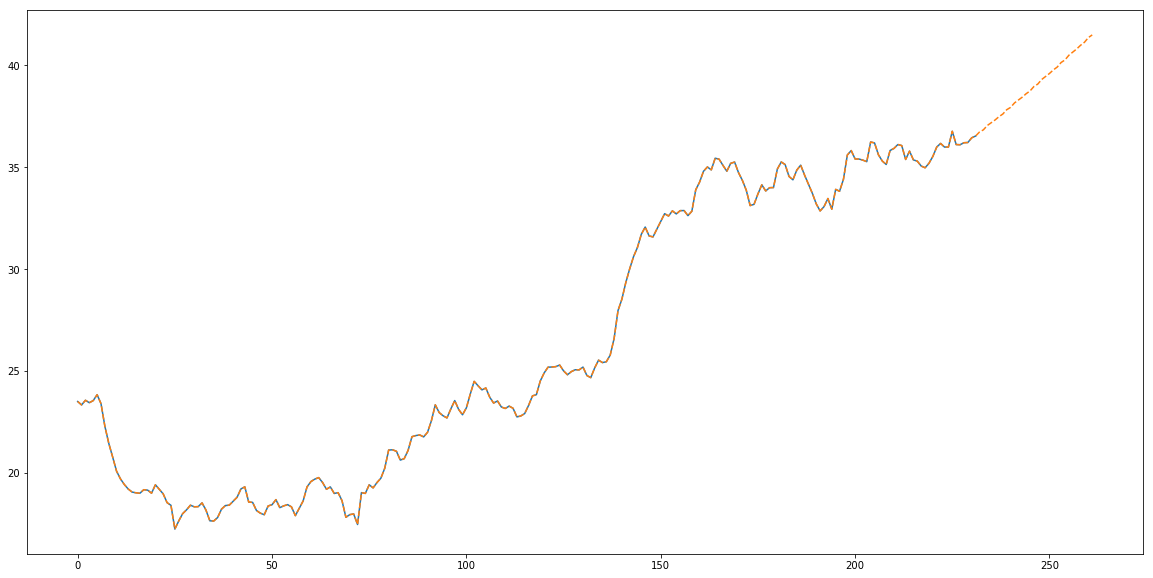

In [94]:
plt.figure(figsize=(20,10))
plt.plot(trainPredict2)
plt.plot(trainPredict2full, '--')
plt.show()